In [2]:
!wget https://raw.githubusercontent.com/ValeriaM95/practice_10/main/helper_functions.py

--2022-07-26 03:15:08--  https://raw.githubusercontent.com/ValeriaM95/practice_10/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1603 (1.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   1.57K  --.-KB/s    in 0s      

2022-07-26 03:15:08 (23.7 MB/s) - ‘helper_functions.py’ saved [1603/1603]



In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-07-26 03:15:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   123MB/s    in 1.3s    

2022-07-26 03:15:45 (123 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("10_food_classes_10_percent.zip")
walk_through_dir("10_food_classes_10_percent.zip")

In [6]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [7]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 750 files belonging to 10 classes.


In [8]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [9]:
## Model 0 (baseline)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
x=base_model(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_0=tf.keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_0_history = model_0.fit(train_data_10_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="10_percent_feature_extraction")])

16719872/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220726-031910
Epoch 1/5
24/24 [==============================] - 74s 3s/step - loss: 1.9078 - accuracy: 0.4147 - val_loss: 1.3296 - val_accuracy: 0.7083
Epoch 2/5
24/24 [==============================] - 68s 3s/step - loss: 1.1407 - accuracy: 0.7413 - val_loss: 0.8301 - val_accuracy: 0.8490
Epoch 3/5
24/24 [==============================] - 65s 3s/step - loss: 0.8380 - accuracy: 0.8067 - val_loss: 0.6700 - val_accuracy: 0.8646
Epoch 4/5
24/24 [==============================] - 63s 3s/step - loss: 0.6837 - accuracy: 0.8373 - val_loss: 0.5964 - val_accuracy: 0.8594
Epoch 5/5
24/24 [==============================] - 65s 3s/step - loss: 0.5831 - accuracy: 0.8680 - val_loss: 0.4892 - val_accuracy: 0.9062


In [10]:
model_0.evaluate(test_data)

24/24 [==============================] - 43s 2s/step - loss: 0.5077 - accuracy: 0.8960


[0.5077371597290039, 0.8960000276565552]

In [11]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


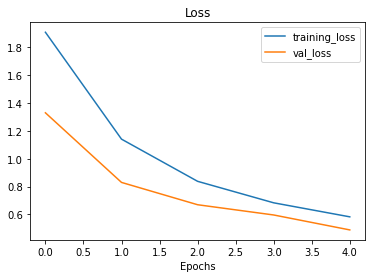

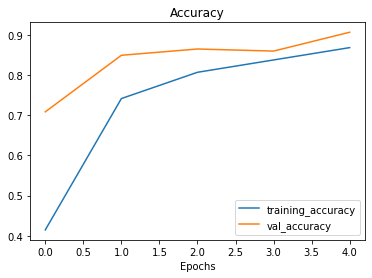

In [12]:
plot_loss_curves(model_0_history)

In [21]:
#Experiments
#1. model_1: 1% of data and data augmentation
#2. model_2: 10% of data and data augmentation
#3. model_3: fine tuning with 10% of data and data augmentation
#4. model_4: fine tuning with 100% of data and data augmentation

In [13]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")


--2022-07-26 03:27:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   270MB/s    in 0.5s    

2022-07-26 03:27:54 (270 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [16]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'

In [17]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2)
], name="data_augmentation")

In [19]:
#1. model_1: 1% of data and data augmentation
input_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x=data_augmentation(inputs)
x=base_model(x, training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_1=tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1_history = model_1.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20220726-033206
Epoch 1/5
3/3 [==============================] - 55s 23s/step - loss: 2.4097 - accuracy: 0.1429 - val_loss: 2.1999 - val_accuracy: 0.2138
Epoch 2/5
3/3 [==============================] - 40s 19s/step - loss: 2.1468 - accuracy: 0.2429 - val_loss: 2.0735 - val_accuracy: 0.2829
Epoch 3/5
3/3 [==============================] - 46s 22s/step - loss: 1.8975 - accuracy: 0.4429 - val_loss: 1.9601 - val_accuracy: 0.3701
Epoch 4/5
3/3 [==============================] - 42s 20s/step - loss: 1.7669 - accuracy: 0.5000 - val_loss: 1.8764 - val_accuracy: 0.4079
Epoch 5/5
3/3 [==============================] - 40s 19s/step - loss: 1.6126 - accuracy: 0.6286 - val_loss: 1.7869 - val_accuracy: 0.4770


In [20]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [21]:
results_model_1 = model_1.evaluate(test_data)
results_model_1

79/79 [==============================] - 148s 2s/step - loss: 1.7859 - accuracy: 0.4844


[1.7859208583831787, 0.4844000041484833]

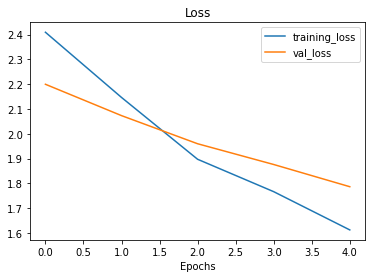

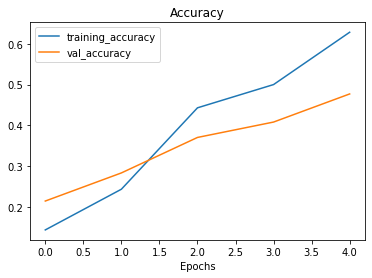

In [22]:
plot_loss_curves(model_1_history)

In [23]:
#2. model_2: 10% of data and data augmentation
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
input_shape = (224,224,3)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x=data_augmentation(inputs)
x=base_model(x, training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2=tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [25]:
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"), 
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220726-034102
Epoch 1/5
3/3 [==============================] - ETA: 0s - loss: 2.4561 - accuracy: 0.0714
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 55s 23s/step - loss: 2.4561 - accuracy: 0.0714 - val_loss: 2.2455 - val_accuracy: 0.1645
Epoch 2/5
3/3 [==============================] - ETA: 0s - loss: 2.2322 - accuracy: 0.1857
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 46s 22s/step - loss: 2.2322 - accuracy: 0.1857 - val_loss: 2.1413 - val_accuracy: 0.2237
Epoch 3/5
3/3 [==============================] - ETA: 0s - loss: 2.0461 - accuracy: 0.3286
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
3/3 [==============================] - 45s 22s/step - loss: 2.0461 - accuracy: 0.3286 - val_loss: 2.0235 - val_accuracy: 0.3289
Epoch 4/5
3/3 [====

In [26]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 151s 2s/step - loss: 1.8570 - accuracy: 0.4296


[1.8569732904434204, 0.4296000003814697]

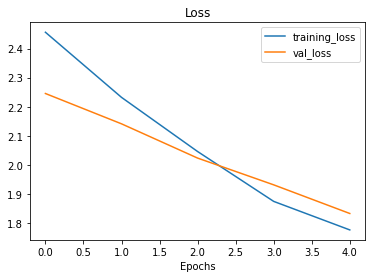

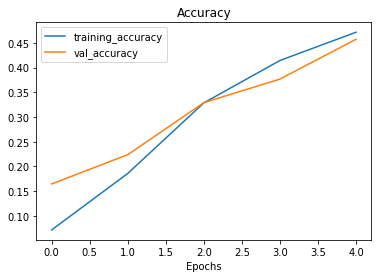

In [27]:
plot_loss_curves(history_10_percent_data_aug)

In [28]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 147s 2s/step - loss: 1.8570 - accuracy: 0.4296


In [29]:
results_10_percent_data_aug == loaded_weights_model_results

True

In [30]:
loaded_weights_model_results

[1.8569732904434204, 0.4296000003814697]

In [31]:
results_10_percent_data_aug

[1.8569732904434204, 0.4296000003814697]

In [32]:
#3. model_3: fine tuning with 10% of data and data augmentation
model_2.layers

In [33]:
for layers in model_2.layers:
  print(layers, layers.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f1c280acb90> True
<keras.engine.sequential.Sequential object at 0x7f1bae99b3d0> True
<keras.engine.functional.Functional object at 0x7f1bad405ad0> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f1bad607610> True
<keras.layers.core.dense.Dense object at 0x7f1bad3e59d0> True


In [34]:
print(len(model_2.layers[2].trainable_variables))

0


In [35]:
base_model.trainable = True

#Freeze all ayers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

#recompile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [37]:
print(len(model_2.trainable_variables))

12


In [38]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) 

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220726-035241
Epoch 5/10
3/3 [==============================] - 56s 23s/step - loss: 1.5952 - accuracy: 0.5714 - val_loss: 1.7678 - val_accuracy: 0.4918
Epoch 6/10
3/3 [==============================] - 41s 19s/step - loss: 1.4401 - accuracy: 0.7286 - val_loss: 1.6944 - val_accuracy: 0.5296
Epoch 7/10
3/3 [==============================] - 46s 22s/step - loss: 1.3167 - accuracy: 0.8143 - val_loss: 1.6365 - val_accuracy: 0.5477
Epoch 8/10
3/3 [==============================] - 43s 20s/step - loss: 1.2229 - accuracy: 0.8000 - val_loss: 1.5540 - val_accuracy: 0.5641
Epoch 9/10
3/3 [==============================] - 42s 20s/step - loss: 1.1551 - accuracy: 0.8000 - val_loss: 1.4795 - val_accuracy: 0.5921
Epoch 10/10
3/3 [==============================] - 45s 22s/step - loss: 0.9872 - accuracy: 0.9143 - val_loss: 1.4533 - val_accuracy: 0.5872


In [39]:
# Evaluate the model on the test data
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 153s 2s/step - loss: 1.4659 - accuracy: 0.5872


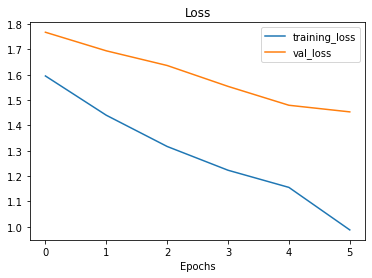

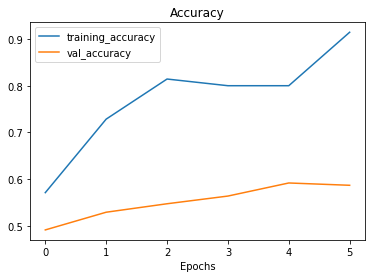

In [40]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [41]:
#4. model_4: fine tuning with 100% of data and data augmentation
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2022-07-26 04:02:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.213.128, 173.194.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   158MB/s    in 3.1s    

2022-07-26 04:02:33 (158 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [42]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [43]:
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [44]:
model_2.load_weights(checkpoint_path) # revert model back to saved weights

In [45]:
model_2.evaluate(test_data)

79/79 [==============================] - 149s 2s/step - loss: 1.8570 - accuracy: 0.4296


[1.8569730520248413, 0.4296000003814697]

In [46]:
results_10_percent_data_aug

[1.8569732904434204, 0.4296000003814697]

In [47]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [48]:
# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [49]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20220726-040511
Epoch 5/10
235/235 [==============================] - 600s 3s/step - loss: 0.9606 - accuracy: 0.7012 - val_loss: 0.4190 - val_accuracy: 0.8668
Epoch 6/10
235/235 [==============================] - 680s 3s/step - loss: 0.6283 - accuracy: 0.7999 - val_loss: 0.3519 - val_accuracy: 0.8832
Epoch 7/10
235/235 [==============================] - 667s 3s/step - loss: 0.5488 - accuracy: 0.8255 - val_loss: 0.3211 - val_accuracy: 0.9095
Epoch 8/10
235/235 [==============================] - 625s 3s/step - loss: 0.5023 - accuracy: 0.8379 - val_loss: 0.3401 - val_accuracy: 0.8947
Epoch 9/10
235/235 [==============================] - 564s 2s/step - loss: 0.4653 - accuracy: 0.8524 - val_loss: 0.3160 - val_accuracy: 0.8964
Epoch 10/10
235/235 [==============================] - 572s 2s/step - loss: 0.4260 - accuracy: 0.8664 - val_loss: 0.3061 - val_accuracy: 0.9062


In [50]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 182s 2s/step - loss: 0.3023 - accuracy: 0.9020


[0.30226999521255493, 0.9020000100135803]

In [51]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot 

2022-07-26 05:11:58.915954: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/CNn92Q48Q8mq0GBM6EYQjQ/

[2022-07-26T05:11:59] Started scanning logdir.
[2022-07-26T05:12:04] Total uploaded: 162 scalars, 0 tensors, 5 binary objects (4.0 MB)
[2022-07-26T05:12:04] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/CNn92Q48Q8mq0GBM6EYQjQ/
